In [ ]:
# default_exp s_plots

In [ ]:
#hide_input
import pivotpy as pp 
pp.nav_links(2)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` XmlElementTree&nbsp;](https://massgh.github.io/pivotpy/XmlElementTree)  
> [&nbsp;`▶` StaticPlots●&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` Utilities&nbsp;](https://massgh.github.io/pivotpy/Utilities)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  


# Static Plots
> All types of plots in matplotlib are included in this module. This includes bands,DOS and other general plots, which can be saved as pdf,png,jpg and other formats that matplotlib offers.

## Passing Large Number of Arguments as a Dictionary
- Let's take example of `plot_bands`. It requires 10 arguments and most of them are default, but in order to tweak parameters, you still need to access them. Follow These steps to input arguments easily.
- In code cell, write `plot_bands?` and hit enter. This will give Signature and DocString.
- Copy arguments and pass to a dictionary `dict(what you copied)`. In a Jupyter Notebook cell, you can edit it:

In [ ]:
arg_dict=dict(
    ax=None,
    kpath=None,
    bands=None,
    showlegend=True,
    E_Fermi=0,
    color1=(1, 0, 0.8),
    style1='solid',
    lw1=0.7,
    )
arg_dict

{'ax': None,
 'kpath': None,
 'bands': None,
 'showlegend': True,
 'E_Fermi': 0,
 'color1': (1, 0, 0.8),
 'style1': 'solid',
 'lw1': 0.7}

- As you can see, I deleted few unnecessary arguments. Now you can use dictionary unpacking operator `**` inside function, it will pass all arguments present in dictionary. Make sure you do not change name of variables, although you can delete as few of them.
- **Usage:** Call function as `plot_bands(**arg_dict)`. You can edit dictionary on fly, or can save it to a file to read (Not recommended, could be a threat to your system security as reading dictionaries from a file could run potentially harmful commands as well.)

## Simple Band Struture Plots

In [ ]:
#export
def plot_bands(ax=None,kpath=None,bands=None,showlegend=False,E_Fermi=None,\
                color1=(0,0,0.8),style1='solid',lw1=0.7,color2=(0.8,0,0),style2='dashed',lw2=0.7):
    """
    - Returns axes object and plot on which all matplotlib allowed actions could be performed.
    - **Parameters**
        - ax         : Matplotlib axes object, if not given, one is created.
        - kpath      : 1D array from `get_kpts`().kpath or `export_vasprun`().kpath.
        - bands      : Dictionary Object from `get_evals` or `export_vasprun`().bands.
        - showlegend : Boolean, default is False, if true, gives legend for spin-polarized calculations.
        - E_Fermi    : If not given, automatically picked from bands object.
        - **kwargs   : lines color,width and style to distinguish spin Up and Down.
    - **Returns**
        - ax : matplotlib axes object with plotted bands.
    """
    import pivotpy.g_utils as gu
    # Fixing ax argument
    if(ax==None):
        import matplotlib.pyplot as plt
        fig,ax=plt.subplots(1,1,figsize=(3.4,2.6))
    else:
        ax==ax
    # Fixing kpath argument
    if(kpath==None):
        raise ValueError("kpath is not provided. Use get_kpath() or export_vasprun().kpath to generate it.")
    # Fixing bands arguement
    if(bands==None):
        raise ValueError("bands object is not provided. Use get_evals() or export_vasprun().bands to generate it.")
    if(E_Fermi==None):
       E_Fermi = bands.E_Fermi
    # Plotting
    if(bands.ISPIN==1):
        if(not bands.evals.all()):
            gu.printy("Can not plot an empty eigenvalues object.")
            return gu.printg("Try with large energy range.")
        en=bands.evals-E_Fermi
        ax.plot(kpath,en,color=color1,lw=lw1,ls=style1)
    if(bands.ISPIN==2):
        if(not bands.evals.SpinUp.all()):
            gu.printy("Can not plot an empty eigenvalues object.")
            return gu.printg("Try with large energy range.")
        enUp=bands.evals.SpinUp-E_Fermi
        enDown=bands.evals.SpinDown-E_Fermi
        ax.plot(kpath,enUp,color=color1,lw=lw1,ls=style1)
        ax.plot(kpath,enDown,color=color2,lw=lw2,ls=style2)
        # Legend only for spin polarized
        if(showlegend==True):
            ax.plot([],[],color=color1,lw=lw1,ls=style1,label='Spin Up')
            ax.plot([],[],color=color2,lw=lw2,ls=style2,label='Spin Down')
            ax.legend(fontsize='small',frameon=False,ncol=2, bbox_to_anchor=(0, 1), loc='lower left');
    return ax

In [ ]:
#export
def modify_axes(ax=None,xticks=[],xt_labels=[],xlim=[],\
            yticks=[],yt_labels=[],ylim=[],xlabel=None,ylabel=None,\
            vlines=True,zeroline=True):
    """
    - Returns None, applies given settings on axes. Prefered to use before other plotting.
    - **Parameters**
        - ax  : Matplotlib axes object.
        - (x,y)ticks : List of positions on (x,y axes).
        - (xt,yt)_labels : List of labels on (x,y) ticks points.
        - (x,y)lim : [min, max] of (x,y) axes.
        - (x,y)label : axes labels.
        - vlines : If true, drawn when `ylim` is not empty.
        - zeroline : If True, drawn when `xlim` is not empty.
    """
    if(ax==None):
        raise ValueError("Matplotlib axes (ax) is not given.")
    else:
        import matplotlib as mpl
        from matplotlib import rc
        mpl.rcParams['axes.linewidth'] = 0.4 #set the value globally
        mpl.rcParams['font.serif'] = "STIXGeneral"
        mpl.rcParams['font.family'] = "serif"
        mpl.rcParams['mathtext.fontset'] = "stix"
        if(xticks):
            ax.set_xticks(xticks)
            ax.set_xticklabels(xt_labels)
        if(yticks):
            ax.set_yticks(yticks)
            ax.set_yticklabels(yt_labels)
        if(xlim):
            ax.set_xlim(xlim)
            if(zeroline==True):
                ax.hlines(0,min(xlim),max(xlim),color=(0,0,0,0.6), linestyle='dashed',lw=0.3)
        if(ylim):
            ax.set_ylim(ylim)
            if(vlines==True):
                [ax.vlines(tick,min(ylim),max(ylim),color=(0,0,0,0.6), linestyle='dashed',lw=0.3) for tick in xticks]
        if(xlabel!=None):
            ax.set_xlabel(xlabel)
        if(ylabel!=None):
            ax.set_ylabel(ylabel)
        ax.tick_params(direction='in', top=True,bottom=True,left=True,right=True,length=4, width=0.3, grid_alpha=0.8)
    return None

In [ ]:
#hide
f1='E:/Research/graphene_example/ISPIN_1/bands/vasprun.xml'
f2='E:/Research/graphene_example/ISPIN_2/bands/vasprun.xml'
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors
from matplotlib import rc
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import collections  as mc
mpl.rcParams['axes.linewidth'] = 0.4 #set the value globally
mpl.rcParams['font.serif'] = "STIXGeneral"
mpl.rcParams['font.family'] = "serif"
mpl.rcParams['mathtext.fontset'] = "stix"

Working in object-oriented way, we can have plenty of options in matplotlib. See the example below, which provides an overview of flexibility of matplotlib. All functions are defined in object-oriented way for better compatibility and flexibility. 

## Example: Graphene

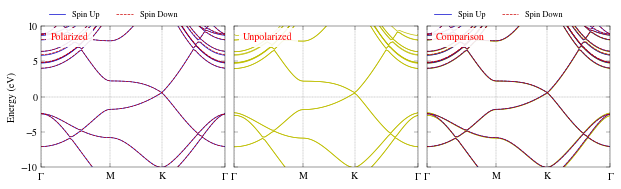

In [ ]:
import pivotpy.vr_parser as vp
vr1=vp.export_vasprun(path=f1)
vr2=vp.export_vasprun(path=f2)
import pivotpy.s_plots as sp
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,3,figsize=(10.2,2.6),sharey=True)
ax0=sp.plot_bands(ax=ax[0],kpath=vr2.kpath,bands=vr2.bands,showlegend=True)

ax1=sp.plot_bands(ax=ax[1],kpath=vr1.kpath,bands=vr1.bands,color1='y')

ax2=sp.plot_bands(ax=ax[2],kpath=vr1.kpath,bands=vr1.bands,color1='y')
ax2=sp.plot_bands(ax=ax[2],kpath=vr2.kpath,bands=vr2.bands,showlegend=True)
xticks=[vr1.kpath[i] for i in [0,30,60,-1]]
txts=["Polarized","Unpolarized","Comparison"]
for axes,txt in zip(ax,txts):
    if axes==ax0:
        sp.modify_axes(ax=axes,ylabel='Energy (eV)')
    sp.modify_axes(ax=axes,ylim=[-10,10],xlim=[xticks[0],xticks[-1]],xticks=xticks,xt_labels=[r'$\Gamma$','M','K',r'$\Gamma$'])
    axes.text(0.05,0.9,txt,bbox=dict(edgecolor='white',facecolor='white', alpha=0.9),transform=axes.transAxes,color='red')
plt.subplots_adjust(hspace=0.01,wspace=0.05)


In [ ]:
#export
def quick_bplot(path_evr=None,ax=None,skipk=None,joinPathAt=[],elim=[],xt_indices=[],\
            xt_labels=[],E_Fermi=None,figsize=(3.4,2.6),txt=None,xytxt=[0.05,0.9],ctxt='black'):
    """
    - Returns axes object and plot on which all matplotlib allowed actions could be performed.
    - **Parameters**
        - path_evr   : path/to/vasprun.xml or output of `export_vasprun`. Auto picks in CWD.
        - ax         : Matplotlib axes object, if not given, one is created.
        - skipk      : Number of kpoints to skip, default will be from IBZKPT.
        - joinPathAt : Points where kpath is broken.
        - elim       : [min,max] of energy range.
        - E_Fermi    : If not given, automatically picked from `export_vasprun`.
        - xt_indices : High symmetry kpoints indices.abs
        - xt_labels  : High Symmetry kpoints labels.
        - **kwargs   : figsize=(3.4,2.6). Text,its position and color.
    - **Returns**
        - ax : matplotlib axes object with plotted bands.
    """
    import pivotpy.vr_parser as vp
    import pivotpy.s_plots as sp
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from matplotlib import rc
    mpl.rcParams['axes.linewidth'] = 0.4 #set the value globally
    mpl.rcParams['font.serif'] = "STIXGeneral"
    mpl.rcParams['font.family'] = "serif"
    mpl.rcParams['mathtext.fontset'] = "stix"
    #checking type of given path.
    if(path_evr==None):
        vr=vp.export_vasprun(path=path_evr,skipk=skipk,elim=elim,joinPathAt=joinPathAt)
    if(path_evr!=None):
        from os import path as pt
        if(type(path_evr)==vp.Dict2Data):
            vr=path_evr
        elif(pt.isfile(path_evr)):
            vr=vp.export_vasprun(path=path_evr,skipk=skipk,elim=elim,joinPathAt=joinPathAt)
        else:
            return print("path_evr = `{}` does not exist".format(path_evr))
    # Apply a robust final check.
    try:
        vr.bands;vr.kpath
    except:
        return print("Object: \n{} \nis like a lower tree of export_vasprun(). Expects top tree.".format(vr))
    else:
        # Main working here.
        K=vr.kpath
        xticks=[K[i] for i in xt_indices]
        xlim=[min(K),max(K)]
        if(elim):
            ylim=[min(elim),max(elim)]
        else:
            ylim=[]
        if(ax==None):
            fig,ax=plt.subplots(1,1,figsize=figsize)
        sp.modify_axes(ax=ax,ylabel='Energy (eV)',xticks=xticks,xt_labels=xt_labels,xlim=xlim,ylim=ylim)
        sp.plot_bands(ax=ax,kpath=K,bands=vr.bands,showlegend=True,E_Fermi=E_Fermi,lw1=0.9)
        if(txt!=None):
            ax.text(*xytxt,txt,bbox=dict(edgecolor='white',facecolor='white', alpha=0.9),transform=ax.transAxes,color=ctxt)
        else:
            ax.text(*xytxt,vr.sys_info.SYSTEM,bbox=dict(edgecolor='white',facecolor='white', alpha=0.9),transform=ax.transAxes,color=ctxt)

        return ax

In [ ]:
#export
def add_text(ax=None,xs=0.05,ys=0.9,txts='[List]',colors='r'):
    """
    - Adds text entries on axes, given single string or list.
    - **Parameters**
        - xs    : List of x coordinates relative to axes or single coordinate.
        - ys    : List of y coordinates relative to axes or single coordinate.
        - txts  : List of strings or one string.
        - colors: List of x colors of txts or one color.
    """
    if(ax==None):
        raise ValueError("Matplotlib axes (ax) is not given.")
    else:
        import matplotlib as mpl
        from matplotlib import rc
        mpl.rcParams['font.serif'] = "STIXGeneral"
        mpl.rcParams['font.family'] = "serif"
        mpl.rcParams['mathtext.fontset'] = "stix"
        if(type(txts)==str):
            ax.text(xs,ys,txts,bbox=dict(edgecolor='white',facecolor='white', alpha=0.9),transform=ax.transAxes,color=colors)
        if(type(txts)==list):
            for x,y,txt,color in zip(xs,ys,txts,colors):
                ax.text(x,y,txt,bbox=dict(edgecolor='white',facecolor='white', alpha=0.9),transform=ax.transAxes,color=color)
    return None

Below is example where you can add multiple text entries on a `quick_bplot`.

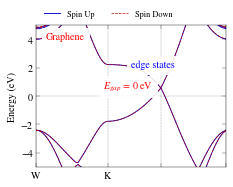

In [ ]:
ax=sp.quick_bplot(path_evr=f2,elim=[-5,5],xt_indices=[0,30,60,-1],xt_labels=['W','K',''],txt='Graphene',ctxt='r')
sp.add_text(ax=ax,xs=[0.35,0.5],ys=[0.55,0.7],txts=[r'$E_{gap}$ = 0 eV','edge states'],colors=['red','blue'])

In [ ]:
#export
def add_legend(ax=None,colors=[],labels=[],styles='solid',\
                widths=0.7,anchor=(0,1), ncol=3,loc='lower left',fontsize='small',frameon=False,**legend_kwargs):
    """
    - Adds custom legeneds on a given axes,returns None.
    - **Parameters**
        - ax       : Matplotlib axes.
        - colors   : List of colors.
        - labels   : List of labels.
        - styles   : str or list of line styles.
        - widths   : str or list of line widths.
        - **kwargs : Matplotlib's legend arguments.
    """
    if(ax==None):
        raise ValueError("Matplotlib axes (ax) is not given.")
    else:
        import matplotlib.pyplot as plt
        from matplotlib import rc
        import matplotlib as mpl
        mpl.rcParams['font.serif'] = "STIXGeneral"
        mpl.rcParams['font.family'] = "serif"
        mpl.rcParams['mathtext.fontset'] = "stix"
        if(type(widths)==float or type(widths)==int):
            if(type(styles)==str):
                for color,label in zip(colors,labels):
                    ax.plot([],[],color=color,lw=widths,linestyle=styles,label=label)
            else:
                for color,label,style in zip(colors,labels,styles):
                    ax.plot([],[],color=color,lw=widths,linestyle=style,label=label)
        else:
            if(type(styles)==str):
                for color,label,width in zip(colors,labels,widths):
                    ax.plot([],[],color=color,lw=width,linestyle=styles,label=label)
            else:
                for color,label,width,style in zip(colors,labels,widths,styles):
                    ax.plot([],[],color=color,lw=width,linestyle=style,label=label)
        ax.legend(fontsize=fontsize,frameon=frameon,ncol=ncol, bbox_to_anchor=anchor, loc=loc,**legend_kwargs)
    return None

In [ ]:
#export
def add_colorbar(ax=None,colors=[],n=20,ticks=[20,60,100],\
            ticklabels=['s','p','d'],linewidth=None,vertical=False,fontsize=8):
    """
    - Plots colorbar on a given axes. This axes should be only for colorbar. Returns None.
    - **Parameters**
        - ax         : Matplotlib axes object.
        - colors     : List of colors in colorbar, if not given, RGB colorbar is added.
        - vertical   : Boolean, default is Fasle.
        - n          : int, number of points between colors. Default 20.
        - ticks      : List of tick points to show on colorbar.
        - ticklabels : List of labels for ticks.
        - linewidth  : To tweek in order to make smooth gradient.
        - fontsize   : Default 8. Adjustable according to plot space.
    """
    if(ax==None):
        raise ValueError("Matplotlib axes (ax) is not given.")
    else:
        import matplotlib as mpl
        from matplotlib import rc
        import matplotlib.pyplot as plt
        import numpy as np
        mpl.rcParams['font.serif'] = "STIXGeneral"
        mpl.rcParams['font.family'] = "serif"
        mpl.rcParams['mathtext.fontset'] = "stix"
        # Colors mixing
        def colorMixer(c1,c2,mix=0):
            c1=np.array(mpl.colors.to_rgb(c1))
            c2=np.array(mpl.colors.to_rgb(c2))
            return mpl.colors.to_rgb((1-mix)*c1 + mix*c2)
        if(colors==[]):
            colors=[(1,0,1),(1,0,0),(1,1,0),(0,1,0),(0,1,1),(0,0,1),(1,0,1)]
        if(linewidth!=None):
            lwd=linewidth
        else:
            lwd=2*3*len(colors)/n
        if(vertical==False):
            for i in range(len(colors)-1):
                for x in range(i*n,(i+1)*n+1):
                    ax.axvline(x, color=colorMixer(colors[i],colors[i+1],(x-i*n)/n), linewidth=lwd)
            ax.set_xlim([0,n*(len(colors)-1)])
            ax.set_ylim([-1,1])
            ax.set_yticks([])
            ax.set_xticks(ticks)
            ax.set_xticklabels(ticklabels,rotation=0)
            ax.tick_params(direction='out',length=2,width=0.3,top=False,left=False,right=False,\
                grid_color=(1,1,1,0), grid_alpha=0)
        if(vertical==True):
            for i in range(len(colors)-1):
                for y in range(i*n,(i+1)*n+1):
                    ax.axhline(y, color=colorMixer(colors[i],colors[i+1],(y-i*n)/n), linewidth=lwd)
            ax.set_ylim([0,n*(len(colors)-1)])
            ax.set_xlim([-1,1])
            ax.set_xticks([])
            ax.set_yticks(ticks)
            ax.set_yticklabels(ticklabels,rotation=90)
            ax.tick_params(direction='out',length=2,width=0.3,top=False,bottom=False,right=False,\
                grid_color=(1,1,1,0), grid_alpha=0)
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(fontsize)
        for child in ax.get_children():
            if isinstance(child, mpl.spines.Spine):
                child.set_color('w')
    return

No handles with labels found to put in legend.


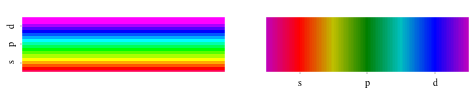

In [ ]:
import pivotpy.s_plots as sp
import matplotlib.pyplot as plt 
fig,ax=plt.subplots(1,2,figsize=(8,1))
sp.add_legend(ax=ax[0],widths=1,styles='dashed',loc='lower left',anchor=(0,1))
sp.add_colorbar(ax=ax[0],fontsize=10,colors=[(1,0,1),(1,0,0),(1,1,0),(0,1,0),(0,1,1),(0,0,1),(1,0,1)],n=3,ticks=[3,9,15],vertical=True)
sp.add_colorbar(ax=ax[1],colors=['m','r','y','g','c','b','m'],fontsize=10)

## Including Atomic and Orbital Projections

In [ ]:
#export
def create_rgb_lines(ax         = None,
                    kpath       = None,
                    evals_set   = None,
                    pros_set    = None,
                    ions        = [0],
                    orbs        = [[0],[],[]],
                    labels   = ['','',''],
                    uni_width   = False,
                    max_width   = 2.5,
                    uni_color   = False,
                    color       = 'red',
                    interpolate = False,
                    n           = 5,
                    k           = 3,
                    scale_color = False
    ):
    """
    - Plot on a given axes or returns line collection, lines and colors if axes is None, which can be added to an ax only onces,by using `ax.add_collection(collection)` and then `ax.autoscale_view()` will make it visible.
    - **Parameters**
        - ax       : Matplotlib axes object, if not given, linecollection is returned.
        - kapath   : `export_vasprun`().kpath or `get_kpts`().kpath.
        - evals_set: `export_vasprun`().bands.evals or `get_evals`().evals. If calculations are spin-polarized, it will be `...evals.SpinUp/SpinDown` for both. You need to create collections twice for SpinUp and SpinDown separately.
        - pros_set : `export_vasprun().pro_bands.pros` or `get_bands_pro_set`().pros. If calculations are spin-polarized, it will be `...pros.SpinUp/SpinDown` for both. You need to create collections twice for SpinUp and SpinDown separately.
        - ions     : List of ions to project on, could be `range(start,stop,step)` as well, remember that `stop` is not included in python. so `range(0,2)` will generate 0 and 1 indices.
        - orbs     : List of three lists of orbitals indices. `[[red],[green],[blue]]`, you can create any color by this combination. For example, to get `s-orbital in yellow color`, you will use `[[0],[0],[]]`. Do not remove empty list from there, it will not effect your orbital selection.
        - uni_width: If True, will keep equal `width=max_width/2` of lines.
        - max_width: Default is 5. Orbitals' projections are added and Normalized to this thickness.
        - uni_color: If True, will not change color in a band from point to point,width is reduced.
        - color    : (str,rgb,rgba), if `uni_color=True`, color will be applied to line.
        - interpolate: Deafult is false, if True, it will add n points between nearest kpoints.
        - n        : int, default is 5. Adds n points between nearest kpoints.
        - k        : int, order of interpolation, defualt is 3. `n > k` should be hold.
        - scale_color: If True, colors are scaled to 1 at each points.
    - **Returns**
        - line collection : Matplotlib line collection object.
        - line patches    : An (N,2,2) dimensional arry.
        - colors          : An (N,4) or (N,3) dimensional list.(Not scaled.)
    - **Exception**
        - If `uni_color` and `uni_width` are True together, this leads to simple plot. No collections will be created. Use `bands_plot()` instead.

    """
    if(pros_set==[]):
        import pivotpy.g_utils as gu
        gu.printy("Can not plot an empty eigenvalues object.")
        return gu.printg("Try with large energy range.")
    if(len(orbs)<3):
        raise ValueError("orbs have structure [[],[],[]], do not reduce structure even if it is empty.")
    elif(uni_width==True and uni_color==True):
        raise ResourceWarning("Keeping `uni_width=True` and `uni_color=True` together is misuse of the system resources, either keep one of them False to proceed or consider using simple plot functions.")
    else:
       import numpy as np
       import matplotlib as mpl
       from matplotlib.collections import LineCollection
       pros=np.take(pros_set,list(ions),axis=0).sum(axis=0)
       if(interpolate==True):
           from pivotpy import g_utils as gu
           knew,evals=gu.interpolate_data(kpath,evals_set,n=n,k=k)
           pros=gu.interpolate_data(kpath,pros,n=n,k=k)[1].clip(min=0)
       else:
           knew,evals,pros=kpath,evals_set,pros
       pros=pros[1:,:,:]+pros[:-1,:,:]
       r=np.take(pros,orbs[0],axis=2).sum(axis=2)
       g=np.take(pros,orbs[1],axis=2).sum(axis=2)
       b=np.take(pros,orbs[2],axis=2).sum(axis=2)
       max_c=max(max(map(max,r[:,:])),max(map(max,g[:,:])),max(map(max,b[:,:])))
       if(max_c==0):
           max_c=1 # Avoid divide by 0.
       #r=r[:,:]/max_c;g=g[:,:]/max_c;b=b[:,:]/max_c #Values are ready in E_Limit
       _cl=np.concatenate((r,g,b)).reshape((3,-1,np.shape(r)[1])).transpose().reshape((-1,3))
       cl=_cl/max_c
       if(scale_color==True):
           cl_max=np.max(_cl,axis=1)
           # avoid divide by zero. Contributions are 4 digits only.
           cl_max = [1 if c==0.0 else c for c in cl_max]
           cl=np.array([c/c_max for c,c_max in zip(_cl,cl_max)])
       clrs=[tuple((cl[i,0],cl[i,1],cl[i,2],1)) for i in range(np.shape(cl)[0])]
       if(uni_width==True):
           lws=(max_width/2)
       else:
           _lw=max_width*np.sum(cl,axis=1)
           _max_lw=np.max(_lw)
           if(_max_lw<0.0000001):
               _max_lw=1  # avoid double_scalar error issue
           lws=0.1+_lw/_max_lw
       if(uni_color==True):
           _pro=np.unique(cl,axis=1).sum(axis=1) #avoid double counting
           pro=_pro/np.max(_pro)
           lws=0.1+pro*max_width*max_c #max_c normalizes automatically if multiple lines plotted.
           clrs=(color)
       kgrid=np.repeat(knew,np.shape(evals)[1],axis=0).reshape((-1,np.shape(evals)[1]))
       narr=np.concatenate((kgrid,evals),axis=0).reshape((2,-1,np.shape(evals)[1]))
       marr=np.concatenate((narr[:,:-1,:],narr[:,1:,:]),axis=0).transpose().reshape((-1,2,2))
       lc=LineCollection(marr,colors=(clrs),linewidths=lws)
       # Add to axis or return if not provided one.
       if(ax!=None):
           ax.add_collection(lc)
           ax.autoscale_view()
       else:
            return lc,marr,_cl

## Using `create_rgb_line` in object oriented way.
- The below example let's user know how to connect pieces of objects to create a complex figure. Note that in case of adding multiple collections on an axes,(left figure),what you see depends on what was the order of adding collections on each other. Also multiple lines are automatically normalized to real data if they have same `max_width`, so you can compare, say, `s` line and `p` line with each other.

In [ ]:
import time
start=time.time()
import numpy as np 
import pivotpy.vr_parser as vp
path='E:/Research/graphene_example/ISPIN_2/bands/vasprun.xml'
vr=vp.export_vasprun(path=path,elim=[-10,10])
k=vr.kpath
ef=vr.tdos.E_Fermi
en=vr.bands.evals.SpinUp-ef
pros=vr.pro_bands.pros.SpinUp

Loading from PowerShell Exported Data...


No handles with labels found to put in legend.


Executed in 0.6590940952301025 seconds.


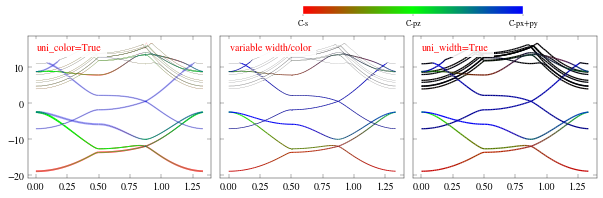

In [ ]:
import pivotpy.s_plots as sp 
import matplotlib.pyplot as plt 
fig1,ax = plt.subplots(1,3,figsize=(10.2,2.6),sharey=True)
axc     = fig1.add_axes([0.5,1,0.3,0.04])
C1      = range(0,1)
spd     = [[0],[1],[2,3]]
sp.create_rgb_lines(ax=ax[0],kpath=k,evals_set=en,pros_set=pros,interpolate=True,n=15,uni_color=True,orbs=[[0],[0],[0]],ions=C1)
sp.create_rgb_lines(ax=ax[0],kpath=k,evals_set=en,pros_set=pros,\
        uni_color=True,color=(0,1,0,1),orbs=[[],[1],[]],ions=C1)
sp.create_rgb_lines(ax=ax[0],kpath=k,evals_set=en,pros_set=pros,uni_color=True,color=(0,0,1,0.4),orbs=[[],[],[2,3]],ions=C1)
sp.create_rgb_lines(ax=ax[1],kpath=k,evals_set=en,pros_set=pros,orbs=spd,ions=C1)
sp.create_rgb_lines(ax=ax[2],kpath=k,evals_set=en,pros_set=pros,\
        uni_width=True,orbs=spd,ions=C1)
[sp.modify_axes(ax=axes) for axes in ax]
sp.add_legend(ax=ax[0],labels=['C-s','C-pz','C-px+py'],widths=4)
sp.add_colorbar(ax=axc,colors=[(1,0,0),(0,1,0),(0,0,1)],ticklabels=['C-s','C-pz','C-px+py'],ticks=[0,100,200],n=100,linewidth=2)
plt.subplots_adjust(wspace=0.05)
txts=['uni_color=True','variable width/color','uni_width=True']
[sp.add_text(ax=axes,txts=txt) for axes,txt in zip(ax,txts)];
print('Executed in {} seconds.'.format(time.time()-start))


In [ ]:
#export
def quick_rgb_lines(path_evr    = None,
                    ax          = None,
                    skipk       = None,
                    joinPathAt  = [],
                    elim        = [],
                    elements    = [[0],[],[]],
                    orbs        = [[0],[],[]],
                    labels      = ['Elem0-s','',''],
                    max_width   = 2.5,
                    xt_indices  = [0,-1],
                    xt_labels   = [r'$\Gamma$','M'],
                    E_Fermi     = None,
                    figsize     = (3.4,2.6),
                    txt         = None,
                    xytxt       = [0.05,0.9],
                    ctxt        = 'black',
                    uni_width   = False,
                    interpolate = False,
                    spin        = 'both',
                    n           = 5,
                    k           = 3,
                    scale_color = True,
                    colorbar    = True,
    ):
    """
    - Returns axes object and plot on which all matplotlib allowed actions could be performed. In this function,orbs,labels,elements all have list of length 3. Inside list, sublists or strings could be any length but should be there even if empty.
    - **Parameters**
        - path_evr   : path/to/vasprun.xml or output of `export_vasprun`. Auto picks in CWD.
        - ax         : Matplotlib axes object, if not given, one is created.
        - skipk      : Number of kpoints to skip, default will be from IBZKPT.
        - joinPathAt : Points where kpath is broken.
        - elim       : [min,max] of energy range.
        - E_Fermi    : If not given, automatically picked from `export_vasprun`.
        - xt_indices : High symmetry kpoints indices.abs
        - xt_labels  : High Symmetry kpoints labels.
        - elements   : List [[0],[],[]] by default and plots s orbital of first ion..
        - orbs       : List [[r],[g],[b]] of indices of orbitals, could be empty, but shape should be same.
        - labels     : List [str,str,str] of projection labels. empty string should exist to maintain shape. Auto adds `↑`,`↓` for ISPIN=2.
        - max_width  : Width to scale whole projections. if `uni_width=True, width=max_width/2`.
        - figsize    : Tuple (width,height) in inches. Default (3.4.2.6) is article column's width.
        - txt        : Text on figure, if None, SYSTEM's name is printed.
        - xytxt      : [x_coord,y_coord] of text relative to axes.
        - ctxt       : color of text.
        - uni_width  : If True, width of bands kept uniform.
        - uni_color  : If True, color of bands kept same.
        - color      : (str,rgb,rgba), if `uni_color=True`, color is applied.
        - spin       : Plot spin-polarized for spin {'up','down','both'}. Default is both.
        - interpolate: Default is False, if True, bands are interpolated.
        - n          : int, number of points, default is 5.
        - k          : int, order of interpolation 0,1,2,3. Defualt 3. `n > k` should be hold.
        - scale_color: Boolean. Default True, colors are scaled to 1 at each point.
        - colorbar   : Default is True. Displays a vertical RGB colorbar.
    - **Returns**
        - ax : matplotlib axes object with plotted projected bands.
    """
    import pivotpy.vr_parser as vp
    import pivotpy.s_plots as sp
    from matplotlib.collections import LineCollection
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from matplotlib import rc
    mpl.rcParams['axes.linewidth'] = 0.4 #set the value globally
    mpl.rcParams['font.serif'] = "STIXGeneral"
    mpl.rcParams['font.family'] = "serif"
    mpl.rcParams['mathtext.fontset'] = "stix"
    #checking type of given path.
    if(path_evr==None):
        vr=vp.export_vasprun(path=path_evr,skipk=skipk,elim=elim,joinPathAt=joinPathAt)
    if(path_evr!=None):
        from os import path as pt
        if(type(path_evr)==vp.Dict2Data):
            vr=path_evr
        elif(pt.isfile(path_evr)):
            vr=vp.export_vasprun(path=path_evr,skipk=skipk,elim=elim,joinPathAt=joinPathAt)
        else:
            return print("path_evr = `{}` does not exist".format(path_evr))
    # Apply a robust final check.
    try:
        vr.bands;vr.kpath
    except:
            return print("Object: \n{} \nis like a lower tree of export_vasprun(). Expects top tree.".format(vr))
    else:
        ## Main working here.
        if(vr.pro_bands==None):
            import pivotpy.g_utils as gu
            gu.printy("Can not plot an empty eigenvalues object.")
            return gu.printg("Try with large energy range.")
        if not spin in ('up','down','both'):
            raise ValueError(
                "spin can take `up`,`down` or `both` values only.")
            return
        def _re_collect(ax,arr,clr1,clr2,clr3,max_width=5, uni_width=uni_width):
                _cl=[[c1[0],c2[1],c3[2]] for c1,c2,c3 in zip(clr1,clr2,clr3)]
                import numpy as np
                if(scale_color==True):
                    cl_max=np.max(_cl,axis=1)
                    # avoid divide by zero. Contributions are 4 digits only.
                    cl_max = [1 if c==0.0 else c for c in cl_max]
                    cl=np.array([np.array(c)/c_max for c,c_max in zip(_cl,cl_max)])
                else:
                    cl=np.array(_cl)/np.max(np.unique(_cl))
                clrs=[tuple(((*c,1))) for c in cl]
                if(uni_width==True):
                    lws=(max_width/2)
                else:
                    lws=np.sum(_cl,axis=1)
                    lws=0.1+max_width*lws/np.max(lws)
                lc=LineCollection(arr,colors=clrs,linewidths=lws)
                ax.add_collection(lc)
                ax.autoscale_view()
                return lc
        #=====================================================
        orbs=[[item] if type(item)==int else item for item in orbs] #Fix if integer given.
        elem_inds = vr.sys_info.ElemIndex
        max_ind   = elem_inds[-1]-1 # Last index is used for range in ElemIndex, not python index.
        for i,elem in enumerate(elements.copy()):
            if(type(elem)==int):
                if(elem <= max_ind):
                    elements[i]=range(elem_inds[elem],elem_inds[elem+1])
                else:
                    return print("index {} is out of bound for ions of length {}".format(elem,max_ind+1))

        if(E_Fermi==None):
            E_Fermi=vr.bands.E_Fermi
        K=vr.kpath
        xticks=[K[i] for i in xt_indices]
        xlim=[min(K),max(K)]
        if(elim):
            ylim=[min(elim),max(elim)]
        else:
            ylim=[]

        nfields=len(vr.pro_bands.labels)
        if(ax==None):
            fig,ax=plt.subplots(1,1,figsize=figsize)

        # After All Fixing
        ISPIN=vr.sys_info.ISPIN
        args_dict=dict(uni_color=False,orbs=orbs,scale_color=scale_color,interpolate=interpolate,n=n,k=k,max_width=max_width) # Do not scale color there, scale here.
        if(ISPIN==1):
            En=vr.bands.evals-E_Fermi
            Pros=vr.pro_bands.pros
            new_args=dict(kpath=K, evals_set=En, pros_set=Pros,**args_dict)
            l_r=[sp.create_rgb_lines(ions=elem,**new_args) for elem in elements]
            _re_collect(ax,l_r[0][1],l_r[0][2],l_r[1][2],l_r[2][2],max_width=max_width,uni_width=uni_width)
        if(ISPIN==2):
            En1=vr.bands.evals.SpinUp-E_Fermi
            En2=vr.bands.evals.SpinDown-E_Fermi
            Pros1=vr.pro_bands.pros.SpinUp
            Pros2=vr.pro_bands.pros.SpinDown
            if(spin=='up'):
                new_args=dict(kpath=K, evals_set=En1, pros_set=Pros1,**args_dict)
                l_r=[sp.create_rgb_lines(ions=elem,**new_args) for elem in elements]
                _re_collect(ax,l_r[0][1],l_r[0][2],l_r[1][2],l_r[2][2],max_width=max_width,uni_width=uni_width)
            if(spin=='down'):
                new_args=dict(kpath=K, evals_set=En2, pros_set=Pros2,**args_dict)
                l_r=[sp.create_rgb_lines(ions=elem,**new_args) for elem in elements]
                _re_collect(ax,l_r[0][1],l_r[0][2],l_r[1][2],l_r[2][2],max_width=max_width,uni_width=uni_width)
            if(spin=='both'):
                # Plotting Up
                new_args1=dict(kpath=K, evals_set=En1, pros_set=Pros1,**args_dict)
                l_r1=[sp.create_rgb_lines(ions=elem,**new_args1) for elem in elements]
                _re_collect(ax,l_r1[0][1],l_r1[0][2],l_r1[1][2],l_r1[2][2],max_width=max_width,uni_width=uni_width)
                # Plotting Down
                new_args2=dict(kpath=K, evals_set=En2, pros_set=Pros2,**args_dict)
                l_r2=[sp.create_rgb_lines(ions=elem,**new_args2) for elem in elements]
                _re_collect(ax,l_r2[0][1],l_r2[0][2],l_r2[1][2],l_r2[2][2],max_width=max_width,uni_width=uni_width)
        x,y=[*xytxt]
        if(txt==None):
            txt=vr.sys_info.SYSTEM
        sp.add_text(ax=ax,xs=x,ys=y,txts=txt,colors=ctxt)
        sp.modify_axes(ax=ax,xticks=xticks,xt_labels=xt_labels,xlim=xlim,ylim=ylim)
        if colorbar:
            _tls_ = ['' for l in labels] # To avoid side effects, new labels array.
            for i,label in enumerate(labels):
                if label and ISPIN==2:
                    _tls_[i] = (label+'$^↑$' if spin=='up' else label+'$^↓$' if spin=='down' else label+'$^{↑↓}$')
            w, h = plt.gcf().get_size_inches()
            w_f = 0.15/w # width of colorbar relative to fontsize=8
            pos = ax.get_position()
            # Make colobar space available from given axis itself
            ax.set_position([pos.x0,pos.y0,pos.width-2.8*w_f,pos.height])
            new_pos = [pos.x0+pos.width-w_f,pos.y0,w_f,pos.height]
            axb = plt.gcf().add_axes(new_pos)
            sp.add_colorbar(ax=axb,vertical=True,ticklabels=_tls_)
        return ax

- **quick_rgb_lines()** is waraper around `create_rgb_lines(uni_color=False)`. You can pass lists for `orbs`,`labels`,`colors` and `elements` eeach of length 3 with one axis. 
    - If you do not provide any arguemnts, this will create graph of whole system projections over s,p,d orbitals.
    - `elements` argument is special, you can pass index of element which will pick all ions of that type, or list(length=3) of indices of ions, e.g in `elements=[0,[0,1],2]` of system Ga`32`As`31`Bi`1`, 0 and 2 pick all ions of Ga and Bi respectively, while [0,1] will pick first two ions of Ga.
    - If `scale_color=True`, ecah point on plot is scaled to maximum color, if `False`, whole plot is scaled.

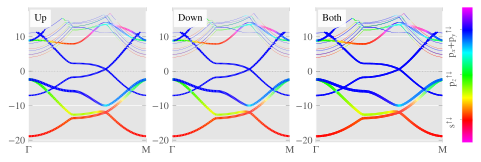

In [ ]:
import os
os.chdir('E:/Research/graphene_example/ISPIN_2/bands')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pivotpy.s_plots as sp
axs=sp.init_figure(nrows=1,ncols=3,figsize=(8,2.5),widths=[3,3,4]);
quick_rgb_lines(ax=axs[0],elements=[0,[0,1],[0,1]],orbs=[0,[1],[2,3]],spin='up',txt='Up',colorbar=False)
quick_rgb_lines(ax=axs[1],elements=[0,[0,1],[0,1]],orbs=[0,[1],[2,3]],spin='down',txt='Down',colorbar=False)
quick_rgb_lines(ax=axs[2],elements=[0,[0,1],[0,1]],orbs=[0,[1],[2,3]],spin='both',txt='Both',colorbar=True,labels=['s','p$_z$','p$_x$+p$_y$'])
plt.show()

In [ ]:
#export
def quick_color_lines(path_evr  = None,
                    axes        = None,
                    skipk       = None,
                    joinPathAt  = [],
                    elim        = [],
                    elements    = [[0],],
                    orbs        = [[0],],
                    labels      = ['s',],
                    color_map   = 'gist_rainbow',
                    max_width   = 2.5,
                    xt_indices  = [0,-1],
                    xt_labels   = [r'$\Gamma$','M'],
                    E_Fermi     = None,
                    showlegend  = True,
                    figsize     = (3.4,2.6),
                    txt         = None,
                    xytxt       = [0.05,0.85],
                    ctxt        = 'black',
                    spin        = 'both',
                    interpolate = False,
                    n           = 5,
                    k           = 3,
                    legend_kwargs={'ncol'           : 4,
                                   'anchor'         : (0,0.85),
                                   'handletextpad'  : 0.5,
                                   'handlelength'   : 1,
                                   'fontsize'       : 'small',
                                   'frameon'        : True
                                   },
                    **subplots_adjust_kwargs
    ):
    """
    - Returns axes object and plot on which all matplotlib allowed actions could be performed. If given, axes,elements,orbs colors, and labels must have same length. If not given, zeroth ion is plotted with s-orbital.
    - **Parameters**
        - path_evr   : Path/to/vasprun.xml or output of `export_vasprun`. Auto picks in CWD.
        - axes       : Matplotlib axes object with one or many axes, if not given, auto created.
        - skipk      : Number of kpoints to skip, default will be from IBZKPT.
        - joinPathAt : Points where kpath is broken.
        - elim       : [min,max] of energy range.
        - E_Fermi    : If not given, automatically picked from `export_vasprun`.
        - xt_indices : High symmetry kpoints indices.abs
        - xt_labels  : High Symmetry kpoints labels.
        - elements   : List [[0],], by defualt and plot first ion's projections.
        - orbs       : List [[0],] lists of indices of orbitals, could be empty.
        - labels     : List [str,] of orbitals labels. len(labels)==len(orbs) must hold.  Auto adds `↑`,`↓` for ISPIN=2.
        - color_map  : Matplotlib's standard color maps. Default is 'gist_ranibow'.
        - showlegend : True by defualt.
        - max_width  : Width to scale whole projections. if `uni_width=True, width=max_width/2`.
        - figsize    : Tuple (width,height) in inches. Default (3.4.2.6) is article column's width.
        - txt        : Text on figure, if None, SYSTEM's name is printed.
        - xytxt      : [x_coord,y_coord] of text relative to axes.
        - ctxt       : color of text.
        - spin       : Plot spin-polarized for spin {'up','down','both'}. Default is both.
        - interpolate: Default is False, if True, bands are interpolated.
        - n          : int, number of points, default is 5.
        - k          : int, order of interpolation 0,1,2,3. Defualt 3. `n > k` should be hold.
        - legend_kwargs: Dictionary to contain legend arguments to fix.
        - **subplots_adjust_kwargs : plt.subplots_adjust parameters.
    - **Returns**
        - ax : matplotlib axes object with plotted projected bands.
    """
    import numpy as np
    import pivotpy.vr_parser as vp
    import pivotpy.s_plots as sp
    import pivotpy as pp
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from matplotlib import rc
    mpl.rcParams['axes.linewidth'] = 0.4 #set the value globally
    mpl.rcParams['font.serif'] = "STIXGeneral"
    mpl.rcParams['font.family'] = "serif"
    mpl.rcParams['mathtext.fontset'] = "stix"
    #checking type of given path.
    if(path_evr==None):
        vr=vp.export_vasprun(path=path_evr,skipk=skipk,elim=elim,joinPathAt=joinPathAt)
    if(path_evr!=None):
        from os import path as pt
        if(type(path_evr)==vp.Dict2Data):
            vr=path_evr
        elif(pt.isfile(path_evr)):
            vr=vp.export_vasprun(path=path_evr,skipk=skipk,elim=elim,joinPathAt=joinPathAt)
        else:
            return print("path_evr = `{}` does not exist".format(path_evr))
    # Apply a robust final check.
    try:
        vr.bands;vr.kpath
    except:
        return print("Object: \n{} \nis like a lower tree of export_vasprun(). Expects top tree.".format(vr))
    else:
        # Main working here.
        if(vr.pro_bands==None):
            import pivotpy.g_utils as gu
            gu.printy("Can not plot an empty eigenvalues object.")
            return gu.printg("Try with large energy range.")
        if not spin in ('up','down','both'):
            raise ValueError(
                "spin can take `up`,`down` or `both` values only.")
            return
        orbs=[[item] if type(item)==int else item for item in orbs] #Fix if integer given.
        elem_inds = vr.sys_info.ElemIndex
        max_ind   = elem_inds[-1]-1 # Last index is used for range in ElemIndex, not python index.
        for i,elem in enumerate(elements.copy()):
            if(type(elem)==int):
                if(elem <= max_ind):
                    elements[i]=range(elem_inds[elem],elem_inds[elem+1])
                else:
                    return print("index {} is out of bound for ions of length {}".format(elem,max_ind+1))
        if(E_Fermi==None):
            E_Fermi=vr.bands.E_Fermi
        K=vr.kpath
        xticks=[K[i] for i in xt_indices]
        xlim=[min(K),max(K)]
        if(elim):
            ylim=[min(elim),max(elim)]
        else:
            ylim=[]

        nfields = len(vr.pro_bands.labels)

        # First fix orbitals
        if(len(elements)!=len(orbs)):
            raise ValueError("elements and orbs expect same length even if their entries are empty.")
            return
        # Fix elements and labels length
        if(len(elements)!=len(labels)):
            raise ValueError("elements and labels expect same length even if their entries are empty.")
            return
        # Fix elements and colors length. ISPIN 2 case is done in loop itself
        if color_map in plt.colormaps():
            from matplotlib.pyplot import cm
            colors  = eval("cm.{}(np.linspace(0,1,len(orbs)))".format(color_map))
        else:
            return print("`color_map` expects one of the follwoing:\n{}".format(plt.colormaps()))

        # Unpack given axes to list.
        try:
            axes=np.reshape(axes,(-1))
        except ValueError:
            axes=[]
        if(not axes.any()):
            axes=sp.init_figure(figsize=figsize)
        axes=np.reshape(axes,(-1))
        if(np.shape(axes)[0]==len(elements)):
            axes=list(axes)
        elif(np.shape(axes)[0]==1):
            axes=[axes[0] for i in range(len(elements))]
        else:
            raise ValueError("axes expect size 1 or len(elements) even if their entries are empty.")
            return

        # After All Fixing
        ISPIN=vr.sys_info.ISPIN
        for ax,elem,orb,color,label in zip(axes,elements,orbs,colors,labels):
            args_dict=dict(ions=elem,uni_color=True,color=(color),orbs=[orb,[],[]],interpolate=interpolate,n=n,k=k,max_width=max_width)
            if(ISPIN==1):
                En=vr.bands.evals-E_Fermi
                Pros=vr.pro_bands.pros
                sp.create_rgb_lines(ax=ax,kpath=K, evals_set=En, pros_set=Pros,**args_dict)
            if(ISPIN==2):
                En1=vr.bands.evals.SpinUp-E_Fermi
                En2=vr.bands.evals.SpinDown-E_Fermi
                Pros1=vr.pro_bands.pros.SpinUp
                Pros2=vr.pro_bands.pros.SpinDown
                if(spin=='up'):
                    sp.create_rgb_lines(ax=ax,kpath=K, evals_set=En1, pros_set=Pros1,**args_dict)
                if(spin=='down'):
                    sp.create_rgb_lines(ax=ax,kpath=K, evals_set=En2, pros_set=Pros2,**args_dict)
                if(spin=='both'):
                    sp.create_rgb_lines(ax=ax,kpath=K, evals_set=En1, pros_set=Pros1,**args_dict)
                    sp.create_rgb_lines(ax=ax,kpath=K, evals_set=En2, pros_set=Pros2,**args_dict)

        x,y=[*xytxt]
        for ax,label,color in zip(axes,labels,colors):
            if label and ISPIN==2:
                label = (label+'$^↑$' if spin=='up' else label+'$^↓$' if spin=='down' else label+'$^{↑↓}$')
            if(showlegend==True):
                sp.add_legend(ax=ax,colors=[(color)],labels=[label],widths=max_width/2,**legend_kwargs)
            elif(showlegend==False):
                sp.add_text(ax=ax,xs=x,ys=y,txts=label,colors=ctxt)
        _ = [sp.modify_axes(ax=ax,xticks=xticks,xt_labels=xt_labels,xlim=xlim,ylim=ylim) for ax in axes]
        plt.subplots_adjust(**subplots_adjust_kwargs)
        return axes

- **quick_color_lines()** is waraper around `create_rgb_lines(uni_color=True,scale_color=False)`. You can pass equal length lists for `orbs`,`labels`, and `elements` either with one axis or mutltiple axes. 
    - If you do not provide any arguemnts, this will plots-orbital of first ion. 
    - `elements` argument is special, you can pass index of element which will pick all ions of that type, or list(length=3) of indices of ions, e.g in `elements=[0,[0,1],2]` of system Ga`32`As`31`Bi`1`, 0 and 2 pick all ions of Ga and Bi respectively, while [0,1] will pick first two ions of Ga.
    - If your given `len(axis)=1`, all projections are plotted on single axis and you can tweak opacity, legend display etc. There are plenty of options.

## Colors Selection
Instead of giving custom colors, you can use matplotlib's colormaps to be consistent. Use 
```python
plt.colormaps()
```
to see list of available color maps. To get a color array from a map, you can do the following:
```python
from matplotlib.pyplot import cm
colors  = cm.hsv(np.linspace(0,1,3))
# This will give you three colors from 'hsv' map.
```
**Note: ** `plotly(quick)_dos_lines` have a custom `RGB` colormap which could be used when plotting DOS with bands of same color. Only works if len(orbs)==3.

In [ ]:
import os
path='E:/Research/graphene_example/ISPIN_2/bands'
os.chdir(path)
import pivotpy as pp
import matplotlib.pyplot as plt
axs=pp.init_figure(nrows=1,ncols=3,figsize=(7,2.5),sharey=True,sharex=True)
args_dict=dict(elements=[0,0,[0,1]],orbs=[0,1,[2]],labels=['s','$p_z$','$p_x$'],hspace=0.1,wspace=0.07,showlegend=True)
quick_color_lines(axes=axs[0],**args_dict,left=0.06,color_map='flag',spin='up');
quick_color_lines(axes=axs[1],**args_dict,left=0.06,color_map='brg',spin='down');
quick_color_lines(axes=axs[2],**args_dict,left=0.06,color_map='viridis',spin='both');

## Initializing Figure

In [ ]:
#export
def init_figure(figsize   = (3.4,2.6),
                nrows     = 1,
                ncols     = 1,
                widths    = [],
                heights   = [],
                axes_off  = [],
                sharex    = False,
                sharey    = False,
                **subplots_adjust_kwargs
                ):
    """
    - Returns all axes of initialized figure, based on plt.subplots().
    - **Parameters**
        - figsize   : Tuple (width, height). Default is (3.4,2.6).
        - nrows     : Default 1.
        - ncols     : Default 1.
        - widths    : List with len(widths)==nrows, to set width ratios of subplots.
        - heights   : List with len(heights)==ncols, to set height ratios of subplots.
        - share(x,y): Share axes between plots, this removes shared ticks automatically.
        - axes_off  : Turn off axes visibility, If `nrows = ncols = 1, set True/False`, If anyone of `nrows or ncols > 1`, provide list of axes indices to turn off. If both `nrows and ncols > 1`, provide list of tuples (x_index,y_index) of axes.
        - **subplots_adjust_kwargs : These are same as `plt.subplots_adjust()`'s arguements.
    """
    import matplotlib.pyplot as plt
    import pivotpy.s_plots as sp
    import matplotlib as mpl
    from matplotlib import rc
    from matplotlib.gridspec import GridSpec
    mpl.rcParams['axes.linewidth'] = 0.4 #set the value globally
    mpl.rcParams['font.serif'] = "STIXGeneral"
    mpl.rcParams['font.family'] = "serif"
    mpl.rcParams['mathtext.fontset'] = "stix"
    # print SVG in ipython
    try:
	    shell = get_ipython().__class__.__name__
	    if shell == 'ZMQInteractiveShell':
		    from IPython.display import set_matplotlib_formats
		    set_matplotlib_formats('svg')
    except: pass
    # ----------------------------
    if(figsize[0] <=2.38):
        mpl.rc('font', size=8)
    gs_kw=dict({}) # Define Empty Dictionary.
    if(widths!=[] and len(widths)==ncols):
        gs_kw=dict({**gs_kw,'width_ratios':widths})
    if(heights!=[] and len(heights)==nrows):
        gs_kw = dict({**gs_kw,'height_ratios':heights})
    fig,axs=plt.subplots(nrows,ncols,figsize=figsize,gridspec_kw=gs_kw,sharex=sharex,sharey=sharey)
    if(nrows*ncols==1):
        sp.modify_axes(ax=axs)
        if(axes_off==True):
            axs.set_axis_off()
    elif(nrows > 1 and ncols==1):
        [sp.modify_axes(ax=ax) for ax in axs]
        [axs[inds].set_axis_off() for inds in axes_off if(axes_off!=[])]
    elif(nrows==1 and ncols>1):
        [sp.modify_axes(ax=ax) for ax in axs]
        [axs[inds].set_axis_off() for inds in axes_off if(axes_off!=[])]
    else:
        [[sp.modify_axes(ax=a) for a in ax] for ax in axs]
        [axs[inds].set_axis_off() for inds in axes_off if(axes_off!=[])]
    plt.subplots_adjust(**subplots_adjust_kwargs)
    return axs

### Tweaking `init_figure` by using `gridspec`. 
- This is a powerful way yo include any type of grid. For this, first use `gs = axs[0,0].get_gridspec()` and then remove axes you want to replace for another shape, then add required axis by `plt.gcf().add_subplot(gs[x_ind, y_ind])`. This process is illustrated in below examples.

- **Soft Tweaking**
    - Axes remain same, just widths and height ratios are chnaged.

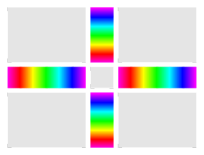

In [ ]:
#First Figure
import pivotpy.s_plots as sp 
axs=init_figure(figsize=(3.4,2.6),ncols=3,widths=[3.4,1,3.4],nrows=3,heights=[2.6,1,2.6],wspace=0.076,hspace=0.1)
[[sp.modify_axes(ax=a,xticks=[0],yticks=[0]) for a in ax] for ax in axs]
[sp.add_colorbar(ax=ax,ticks=[]) for ax in [axs[1,0],axs[1,2]]];
[sp.add_colorbar(ax=ax,vertical=True,ticks=[]) for ax in [axs[0,1],axs[2,1]]];

- **Brute Force Tweaking**
    - Here we will remove and regenerate axes based on our grid choice.

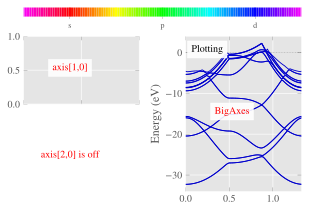

In [ ]:
#Second Figure
axs=sp.init_figure(figsize=(5,3.4),nrows=3,ncols=2,widths=[1,1],heights=[1,7,7],wspace=0.4,hspace=0.4,axes_off=[(2,0)],sharex=True,sharey=True)
import pivotpy.s_plots as sp 
import matplotlib.pyplot as plt
gs = axs[0,0].get_gridspec()
axs_to_remove=[*axs[0, :],*axs[1:, 1]]
for ax in axs_to_remove:
    ax.remove()
axlarge = plt.gcf().add_subplot(gs[0, :])
axv = plt.gcf().add_subplot(gs[1:, 1])
sp.modify_axes(ax=axv)
sp.add_colorbar(ax=axlarge)
sp.add_text(ax=axs[1,0],txts='axis[1,0]',xs=0.25,ys=0.5)
sp.add_text(ax=axs[2,0],txts='axis[2,0] is off',xs=0.15,ys=0.5)
import pivotpy.vr_parser as vp 
vr=vp.export_vasprun(path='E:/Research/graphene_example/ISPIN_1/bands/vasprun.xml')
sp.quick_bplot(path_evr=vr,ax=axv,txt='Plotting',E_Fermi=10)
sp.add_text(ax=axv,txts='BigAxes',xs=0.25,ys=0.5)

- **Mixing 2D and 3D axes in a figure**
    - A minial example below shows deleting an axes and then adding a 3D axes with same dimensions.

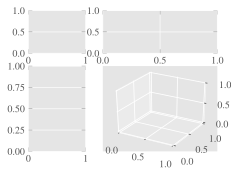

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import pivotpy as pp 
ax = pp.init_figure(nrows=2,ncols=2,widths=[1,2],heights=[1,2])
pos = ax[1,1].get_position()
ax[1,1].remove()
ax[1,1]=plt.gcf().add_axes(pos,projection='3d')

## Plotting Density of States

In [ ]:
#export
def select_pdos(tdos        = None,
                pdos_set    = None,
                ions        = [0,],
                orbs        = [0,],
                E_Fermi     = 0,
                interpolate = False,
                n           = 5,
                k           = 3,
                 ):
    """
    - Returns (interpolated/orginal) enrgy(N,), tdos(N,), and pdos(N,) of selected ions/orbitals.
    - **Parameters**
        - tdos     : `export_vasprun`().tdos or `get_tdos`().tdos. If calculations are spin-polarized, it will be `..tdos.SpinUp/SpinDown` for both. You need to apply this function twice for SpinUp and SpinDown separately.
        - pdos_set : `export_vasprun().pro_dos.pros` or `get_dos_pro_set`().pros. If calculations are spin-polarized, it will be `...pros.SpinUp/SpinDown` for both.
        - ions     : List of ions to project on, could be `range(start,stop,step)` as well, remember that `stop` is not included in python. so `range(0,2)` will generate 0 and 1 indices.
        - orbs     : List of orbitals indices to pick.
        - E_Fermi  : Here it is zero. Needs to be input.
        - interpolate: Deafult is false, if True, it will add n points between nearest points.
        - n        : int, default is 5. Adds n points between nearest kpoints.
        - k        : int, order of interpolation, defualt is 3. `n > k` should be hold.
    """
    if(tdos==[]):
        import pivotpy.g_utils as gu
        return gu.printy("Can not plot empty DOS.")
    import numpy as np
    en= tdos[:,0]-E_Fermi
    t_dos= tdos[:,1]
    pros=np.take(pdos_set[:,:,1:],list(ions),axis=0).sum(axis=0)
    p_dos=np.take(pros,orbs,axis=1).sum(axis=1)
    if(interpolate==True):
        from pivotpy import g_utils as gu
        _en,_tdos=gu.interpolate_data(en,t_dos,n=n,k=k)
        _tdos=_tdos.clip(min=0)
        _en,_pdos=gu.interpolate_data(en,p_dos,n=n,k=k)[1].clip(min=0)
    else:
        _en,_tdos,_pdos=pdos_set[0,:,0]-E_Fermi,t_dos,p_dos # reading _en from projected dos if not interpolated.

    return _en,_tdos,_pdos

In [ ]:
#export
def collect_dos(path_evr      = None,
                elim          = [],
                elements      = [[0],],
                orbs          = [[0],],
                labels        = ['s',],
                E_Fermi       = None,
                spin          = 'both',
                interpolate   = False,
                n             = 5,
                k             = 3
    ):
    """
    - Returns lists of energy,tdos, pdos and labels. If given,elements,orbs and labels must have same length. If not given, zeroth ions is collected with s-orbital.
    - **Parameters**)
        - path_evr   : Path/to/vasprun.xml or output of `export_vasprun`. Auto picks in CWD.
        - elim       : [min,max] of energy range.
        - E_Fermi    : If not given, automatically picked from `export_vasprun`.
        - elements   : List [[0],], by defualt and plot first ion's projections.
        - orbs       : List [[0],] lists of indices of orbitals, could be empty.
        - labels     : List [str,] of orbitals labels. len(labels)==len(orbs) must hold.  Auto adds `↑`,`↓` for ISPIN=2.
        - spin       : Plot spin-polarized for spin {'up','down','both'}. Default is both.
        - interpolate: Default is False, if True, bands are interpolated.
        - n          : int, number of points, default is 5.
        - k          : int, order of interpolation 0,1,2,3. Defualt 3. `n > k` should be hold.
    - **Returns**
        - Energy : (N,1) size.
        - tdos   : (N,1) size or [(N,1),(N,1)] if spin polarized.
        - pdos   : [(N,1),(N,1),...], spin polarized is auto-fixed.
        - labels : ['label1,'label2',...] spin polarized is auto-fixed.
        - vr     : Exported vasprun.
    """
    import numpy as np
    import pivotpy.vr_parser as vp
    import pivotpy.s_plots as sp
    #checking type of given path.
    if(path_evr==None):
        vr=vp.export_vasprun(path=path_evr,elim=elim)
    if(path_evr!=None):
        from os import path as pt
        if(type(path_evr)==vp.Dict2Data):
            vr=path_evr
        elif(pt.isfile(path_evr)):
            vr=vp.export_vasprun(path=path_evr,elim=elim)
        else:
            return print("path_evr = `{}` does not exist".format(path_evr))
    # Apply a robust final check.
    try:
        vr.tdos;vr.pro_dos
    except:
        return print("Object: \n{} \nis like a lower tree of export_vasprun(). Expects top tree.".format(vr))
    else:
        # Main working here.
        if(vr.pro_dos==None):
            import pivotpy.g_utils as gu
            return gu.printy("Can not plot an empty DOS object.")
        if not spin in ('up','down','both'):
            raise ValueError(
                "spin can take `up`,`down` or `both` values only.")
            return
        orbs=[[item] if type(item)==int else item for item in orbs] #Fix if integer given.
        elements=[[item] if type(item)==int else item for item in elements] #Fix if integer given.
        elem_inds = vr.sys_info.ElemIndex
        max_ind   = elem_inds[-1]-1 # Last index is used for range in ElemIndex, not python index.
        for i,elem in enumerate(elements.copy()):
            if(type(elem)==int):
                if(elem <= max_ind):
                    elements[i]=range(i,i+1)
                else:
                    return print("index {} is out of bound for ions of length {}".format(i,max_ind))
        if(E_Fermi==None):
            E_Fermi=vr.tdos.E_Fermi

        nfields = len(vr.pro_dos.labels) - 1 #
        # First fix orbitals
        if len(elements)!=len(orbs) or len(elements)!=len(labels):
            raise ValueError("elements, orbs and labels expect same length even if their entries are empty.")
            return

        # After All Fixing
        ISPIN=vr.sys_info.ISPIN
        e,ts,ps,ls=None,None,[],[] # to collect all total/projected dos.
        for elem,orb,label in zip(elements,orbs,labels):
            args_dict=dict(ions=elem,orbs=orb,interpolate=interpolate,n=n,k=k,E_Fermi=E_Fermi)
            if ISPIN==1:
                tdos=vr.tdos.tdos
                pdos_set=vr.pro_dos.pros
                e,t,p=sp.select_pdos(tdos=tdos,pdos_set=pdos_set, **args_dict)
                ps.append(p)
                ls.append(label)
                ts = t
            if ISPIN==2:
                tdos1=vr.tdos.tdos.SpinUp
                tdos2=vr.tdos.tdos.SpinDown
                pdos_set1=vr.pro_dos.pros.SpinUp
                pdos_set2=vr.pro_dos.pros.SpinDown
                if spin=='up':
                    e,t1,p1=sp.select_pdos(tdos=tdos1,pdos_set=pdos_set1, **args_dict)
                    ps.append(p1)
                    ls.append((label+'$^↑$' if label else ''))
                    ts = t1
                if spin=='down':
                    e,t2,p2=sp.select_pdos(tdos=tdos2,pdos_set=pdos_set2, **args_dict)
                    ps.append(p2)
                    ls.append((label+'$^↓$' if label else ''))
                    ts = t2
                if spin=='both':
                    e,t1,p1=sp.select_pdos(tdos=tdos1,pdos_set=pdos_set1, **args_dict)
                    ps.append(p1)
                    ls.append((label+'$^↑$' if label else ''))
                    e,t2,p2=sp.select_pdos(tdos=tdos2,pdos_set=pdos_set2, **args_dict)
                    ps.append(-p2)
                    ls.append((label+'$^↓$' if label else ''))
                    ts=[t1,-t2]
        return e,ts,ps,ls,vr

- Providing labels while using `collect_dos` is important, it will automatically return spin up/down saymbols.

In [ ]:
#export
def quick_dos_lines(path_evr      = None,
                    ax            = None,
                    elim          = [],
                    include_dos   = 'both',
                    elements      = [[0],],
                    orbs          = [[0],],
                    labels        = ['s',],
                    color_map     = 'gist_rainbow',
                    tdos_color    = (0.8,0.95,0.8),
                    linewidth     = 0.5,
                    fill_area     = True,
                    vertical      = False,
                    E_Fermi       = None,
                    figsize       = (3.4,2.6),
                    txt           = None,
                    xytxt         = [0.05,0.85],
                    ctxt          = 'black',
                    spin          = 'both',
                    interpolate   = False,
                    n             = 5,
                    k             = 3,
                    showlegend    = True,
                    legend_kwargs = {'ncol'         : 4,
                                   'anchor'         : (0,1),
                                   'handletextpad'  : 0.5,
                                   'handlelength'   : 1,
                                   'fontsize'       : 'small',
                                   'frameon'        : True
                                   }

                    ):
        """
        - Returns ax object (if ax!=False) and plot on which all matplotlib allowed actions could be performed, returns lists of energy,tdos and pdos and labels. If given,elements,orbs colors, and labels must have same length. If not given, zeroth ions is plotted with s-orbital.
        - **Parameters**)
            - path_evr   : Path/to/vasprun.xml or output of `export_vasprun`. Auto picks in CWD.
            - ax         : Matplotlib axes object, if None, one is created. If False, data lists are returned.
            - include_dos: One of {'both','tdos','pdos'}.
            - elim       : [min,max] of energy range.
            - E_Fermi    : If not given, automatically picked from `export_vasprun`.
            - elements   : List [[0],], by defualt and plot first ion's projections.
            - orbs       : List [[0],] lists of indices of orbitals, could be empty.
            - labels     : List [str,] of orbitals labels. len(labels)==len(orbs) must hold.  Auto adds `↑`,`↓` for ISPIN=2.
            - color_map  : Matplotlib's standard color maps. Default is 'gist_ranibow'. Use 'RGB' if want to compare with `quick_rgb_lines` with 3 projection inputs (len(orbs)==3).
            - fill_area  : Default is True and plots filled area for dos. If False, plots lines only.
            - vertical   : False, If True, plots along y-axis.
            - showlegend : True by defualt.
            - figsize    : Tuple (width,height) in inches. Default (3.4.2.6) is article column's width.
            - txt        : Text on figure, if None, SYSTEM's name is printed.
            - xytxt      : [x_coord,y_coord] of text relative to axes.
            - ctxt       : color of text.
            - spin       : Plot spin-polarized for spin {'up','down','both'}. Default is both.
            - interpolate: Default is False, if True, bands are interpolated.
            - n          : int, number of points, default is 5.
            - k          : int, order of interpolation 0,1,2,3. Defualt 3. `n > k` should be hold.
            - legend_kwargs: Dictionary to contain legend arguments to fix.
        - **Returns**
            - ax         : Matplotlib axes.
        """
        if(include_dos not in ('both','pdos','tdos')):
            return print("`include_dos` expects one of ['both','pdos','tdos'], got {}.".format(include_dos))
        import pivotpy.s_plots as sp
        import numpy as np, pivotpy as pp 
        import pivotpy.g_utils as gu
        import matplotlib as mpl
        import matplotlib.pyplot as plt
        
        en,tdos,pdos,vr=None,None,None,None # Placeholders for defining. must be here.
        cl_dos=collect_dos(path_evr=path_evr,
                            elim=elim,
                            elements=elements,
                            orbs=orbs,
                            labels=labels,
                            E_Fermi=E_Fermi,
                            spin=spin,
                            interpolate=interpolate,
                            n=n,
                            k=k)
        try:
            en,tdos,pdos,labels,vr=cl_dos # Labels updated
        except TypeError:
            import pivotpy.g_utils as gu
            return gu.printg("Try with large energy range.")
        # Fix elements and colors length
        if color_map in plt.colormaps():
            from matplotlib.pyplot import cm
            if len(tdos) == 2:
                colors  = eval("cm.{}(np.linspace(0,1,2*len(orbs)))".format(color_map))
            else:
                colors  = eval("cm.{}(np.linspace(0,1,len(orbs)))".format(color_map))
        elif 'RGB' in color_map and len(orbs) == 3:
            colors = np.array([[0.9,0,0],[0,0.85,0],[0,0,0.9]])
            if vr.sys_info.ISPIN == 2 and 'both' in spin:
                colors = np.reshape([[c,list(pp.invert_color(c))] for c in colors],(-1,3))
        else:
            return print("`color_map` expects one of the follwoing:\n{}".format(plt.colormaps()))

        # Make additional colors for spin down. Inverted colors are better.
        t_color=mpl.colors.to_rgb(tdos_color)
        it_color=gu.invert_color(color=t_color)
        if(ax==None):
            ax=sp.init_figure(figsize=figsize)
        if(vertical==False):
            if(fill_area==False):
                if(include_dos!='pdos'):
                    if(len(tdos)==2):   # Spin polarized.
                        ax.plot(en,tdos[0],color=(t_color),label=r'TDOS$^↑$',lw=linewidth)
                        ax.plot(en,tdos[1],color=(it_color),label=r'TDOS$^↓$',lw=linewidth)
                    else:   # unpolarized.
                        ax.plot(en,tdos,color=(t_color),label='TDOS',lw=linewidth)
                if(include_dos!='tdos'):
                    for p,l,c in zip(pdos,labels,colors):
                        ax.plot(en,p, color=(c),linewidth=linewidth,label=l)
            if(fill_area==True):
                if(include_dos!='pdos'):
                    if(len(tdos)==2):   # Spin polarized.
                        ax.fill_between(en,tdos[0],color=(t_color),label=r'TDOS$^↑$',lw=0)
                        ax.fill_between(en,tdos[1],color=(it_color),label=r'TDOS$^↓$',lw=0)
                    else:   # unpolarized.
                        ax.fill_between(en,tdos,color=(t_color),label='TDOS',lw=0)
                if(include_dos!='tdos'):
                    for p,l,c in zip(pdos,labels,colors):
                        ax.fill_between(en,p,color=(mpl.colors.to_rgba(c,0.4)),linewidth=0)
                        ax.plot(en,p, color=(c),linewidth=linewidth,label=l)
            if elim:
                ax.set_xlim([min(elim),max(elim)])
        if(vertical==True):
            if(fill_area==False):
                if(include_dos!='pdos'):
                    if(len(tdos)==2):   # Spin polarized.
                        ax.plot(tdos[0],en,color=(t_color),label=r'TDOS$^↑$',lw=linewidth)
                        ax.plot(tdos[1],en,color=(it_color),label=r'TDOS$^↓$',lw=linewidth)
                    else:   # unpolarized.
                        ax.plot(tdos,en,color=(t_color),label='TDOS',lw=linewidth)
                if(include_dos!='tdos'):
                    for p,l,c in zip(pdos,labels,colors):
                        ax.plot(p,en, color=(c),linewidth=linewidth,label=l)
            if(fill_area==True):
                if(include_dos!='pdos'):
                    if(len(tdos)==2):   # Spin polarized.
                        ax.fill_betweenx(en,tdos[0],color=(t_color),label=r'TDOS$^↑$',lw=0)
                        ax.fill_betweenx(en,tdos[1],color=(it_color),label=r'TDOS$^↓$',lw=0)
                    else:   # unpolarized.
                        ax.fill_betweenx(en,tdos,color=(t_color),label='TDOS',lw=0)
                if(include_dos!='tdos'):
                    for p,l,c in zip(pdos,labels,colors):
                        ax.fill_betweenx(en,p,color=(mpl.colors.to_rgba(c,0.4)),linewidth=0)
                        ax.plot(p,en, color=(c),linewidth=linewidth,label=l)
            if elim:
                ax.set_ylim([min(elim),max(elim)])
        if(showlegend==True):
            sp.add_legend(ax=ax,labels=[],colors=colors,widths=linewidth,**legend_kwargs)
        return ax

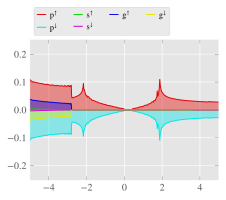

In [ ]:
quick_dos_lines(path_evr='E:/Research/graphene_example/ISPIN_2/dos/vasprun.xml',vertical=False,fill_area=True,showlegend=True,include_dos='pdos',orbs=[[1,2,3],0,1],elements=[0,0,1],linewidth=1,labels=['p','s','g'],color_map='RGB',elim=[-5,5],spin='both')

### High Display Image in Notebook
The function below `plt_to_html` is implemented for use in `pivotpy-dash` app to view and save PNG image directly from web app's interface. This also enables high display output in jupyter notebook.

In [ ]:
#export
def plt_to_html(plt_fig=None,dpi=300,dash_html=None):
    """
    - Returns base64 encoded Image to display in notebook or HTML <img/> or plotly's dash_html_components.Img object.
    - **Parameters**
        - plt_fig  : Matplotlib's figure instance, auto picks as well.
        - dpi      : PNG images's DPI, default is 300.
        - dash_html: Default is None which results in an image display in jupyter notebook.
            - If True, returns html.Img object for plotly's dash.
            - If False, returns html <img/> object to embed in HTML DOM.
    """
    from io import BytesIO
    import matplotlib.pyplot as plt
    import base64
    if plt_fig==None:
        plt_fig = plt.gcf()
    size = plt_fig.get_size_inches()*plt_fig.dpi
    plot_bytes = BytesIO()
    plt.savefig(plot_bytes,format='png',dpi=dpi,transparent=True)
    img = base64.b64encode(plot_bytes.getvalue())
    if dash_html == None:
        try:
            shell = get_ipython().__class__.__name__
            if shell == 'ZMQInteractiveShell':
                from IPython.display import Image
                plt.clf() # Clear other display
                return Image(plot_bytes.getvalue(),width=size[0],height=size[1])
        except:
            return plt.show()
    plt.clf() # Clear image here to avoid output string
    if dash_html==False:
        return "<img src='data:image/png;base64,{}' width='{}' height='{}'/>".format(
                img.decode('utf-8'),*size)
    else:
        import dash_html_components as html
        return html.Img(src="data:image/png;base64,{}".format(img.decode('utf-8')),
                style={"width":"{}px".format(size[0]),"height":"{}px".format(size[1])})

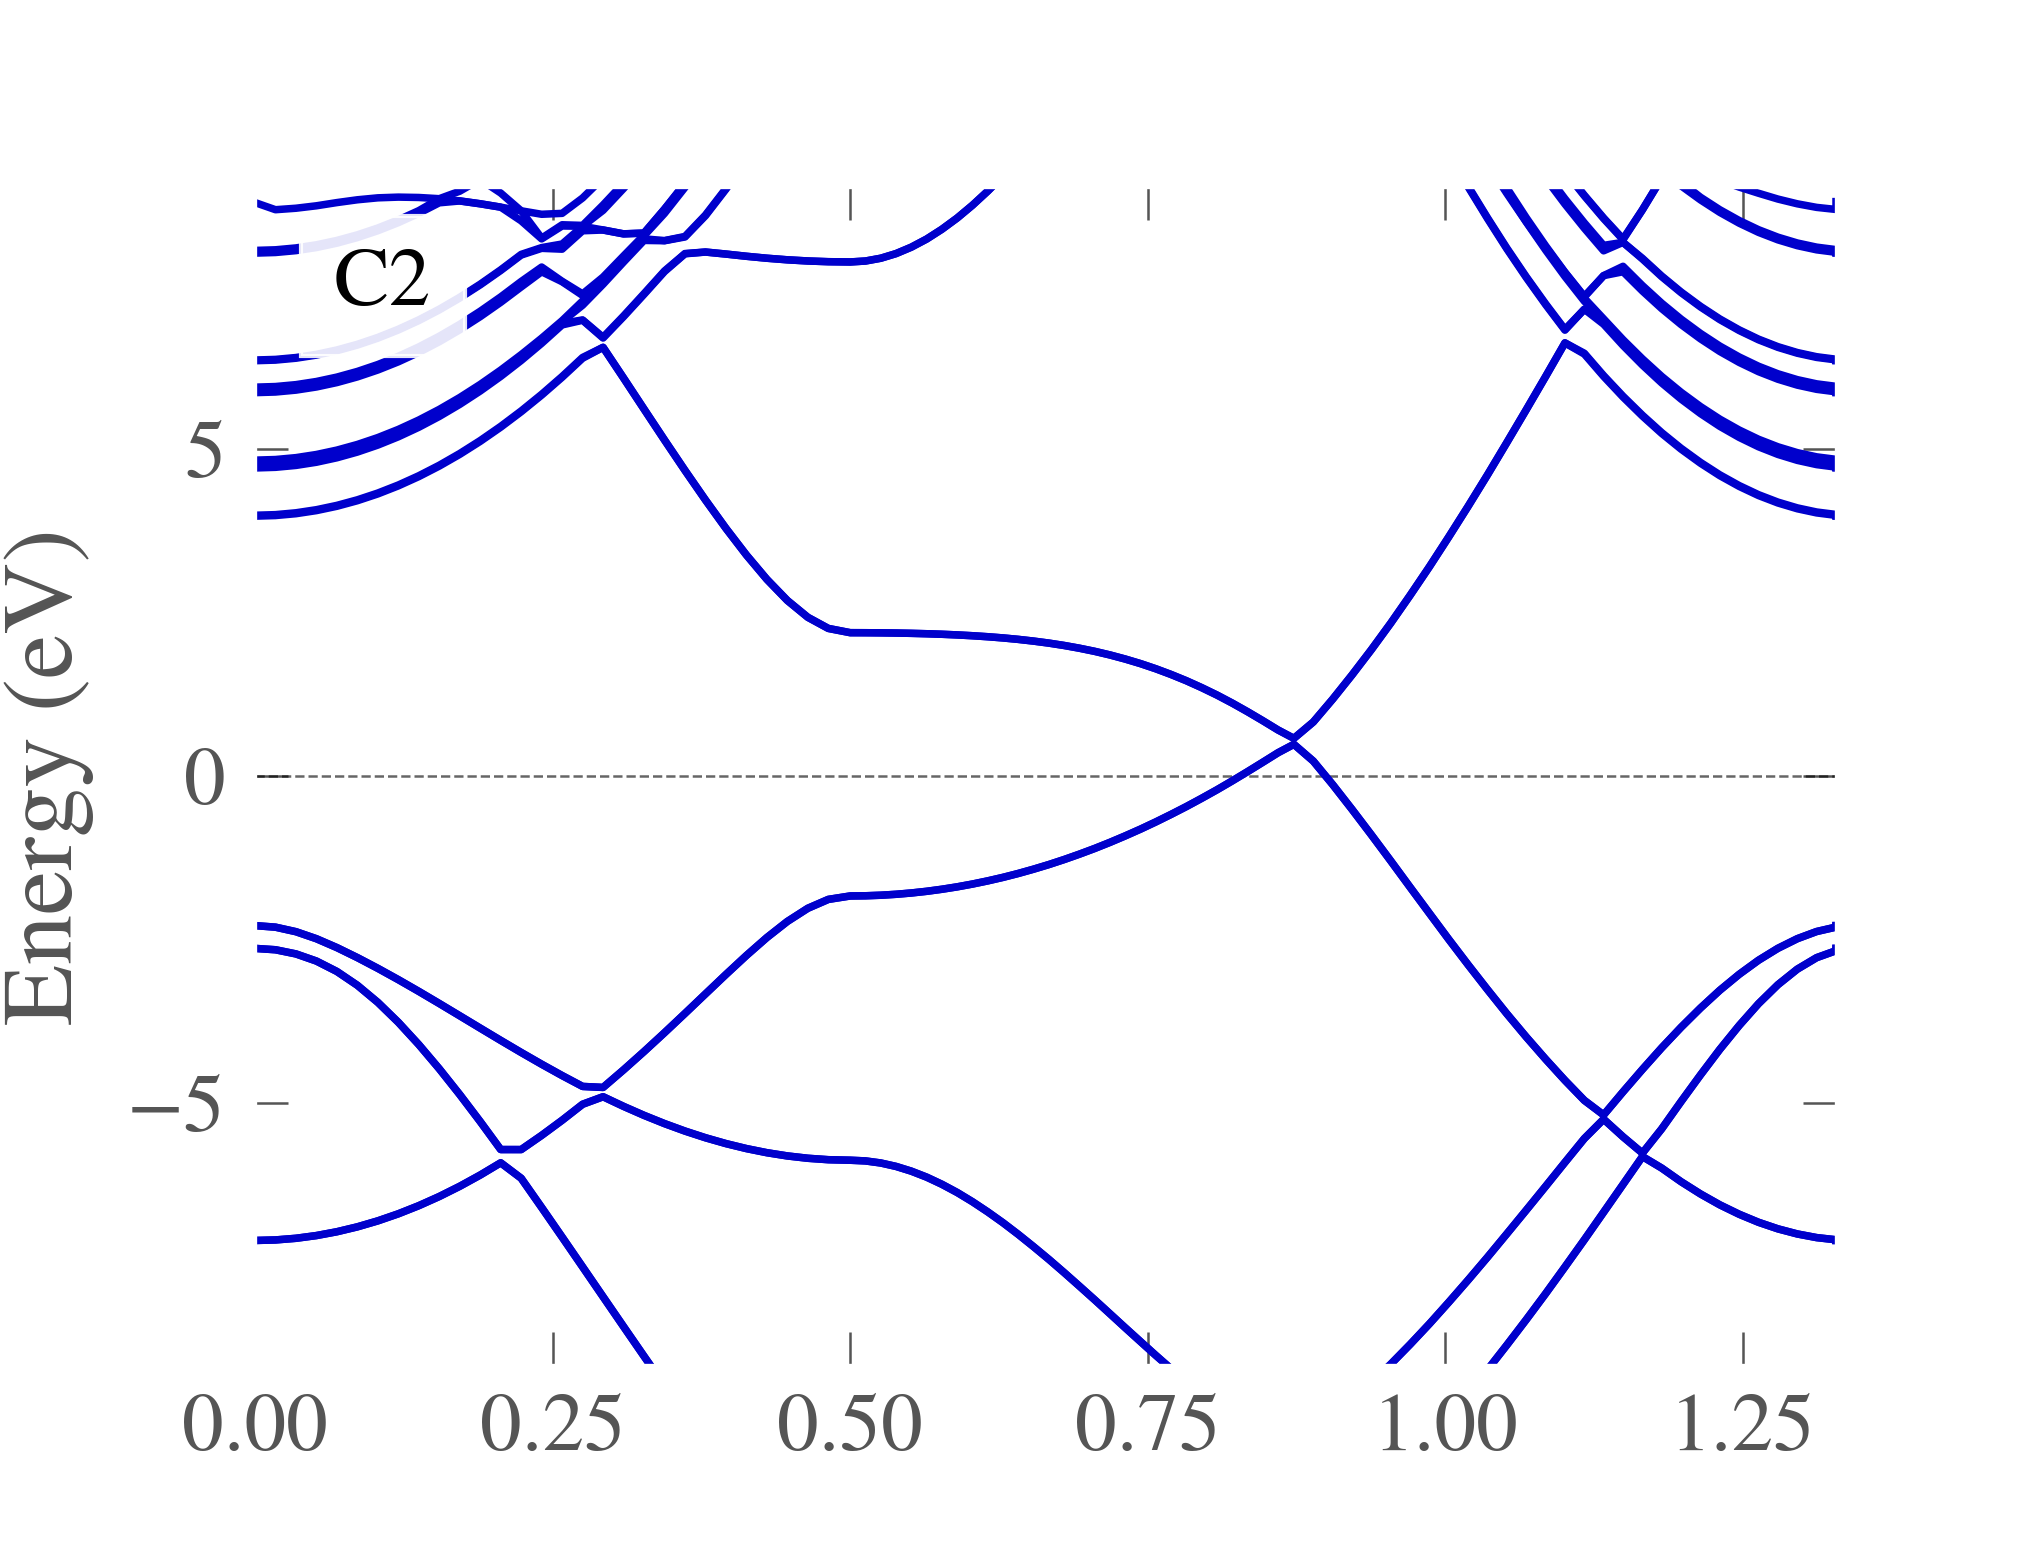

<Figure size 244.8x187.2 with 0 Axes>

In [ ]:
import pivotpy as pp 
import matplotlib.pyplot as plt
pp.quick_bplot("E:/Research/graphene_example/ISPIN_1/bands/vasprun.xml",elim=[-9,9]);
fig = plt_to_html(dpi=600,dash_html=None)
clear_fig = plt.clf() # to clear default display
fig

Below code snippest could be used to create a standalone html document from a figure.
```python
data = plt_to_html(dash_html=False)
html_str= """
<!DOCTYPE html>
<head></head>
<body>
    <div>
    {}
    </div>
</body>
""".format(data)

with open('fig.html','w') as f:
    f.write(html_str)
f.close()
```

In [ ]:
#hide_input
import pivotpy as pp 
pp.nav_links(2)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` XmlElementTree&nbsp;](https://massgh.github.io/pivotpy/XmlElementTree)  
> [&nbsp;`▶` StaticPlots●&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` Utilities&nbsp;](https://massgh.github.io/pivotpy/Utilities)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  
